## Reading in and pre-processing the data

In [3]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns 
from PIL import Image

from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

In [24]:
images = "/Users/lawrence/Desktop/GTSRB/Train/"
data = []; labels = []
classes = 43
for i in range(classes):
    img_path = os.path.join(images,str(i)) 
    for img in os.listdir(img_path):
        im = Image.open(img_path +'/'+ img)
        im = im.resize((32,32))
        im = np.array(im)
        data.append(im)
        labels.append(i)
        
data = np.array(data); labels = np.array(labels)
data.shape

(39209, 32, 32, 3)

## Taking a look at some of the images

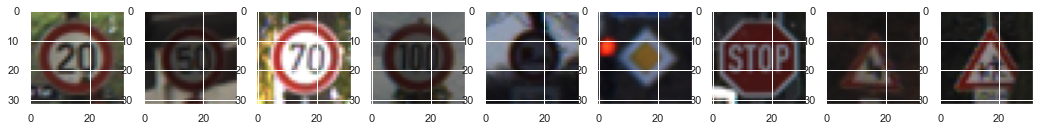

In [60]:
fig, (ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9) = plt.subplots(1, 9)
ax1.imshow(data[1])
ax2.imshow(data[3000])
ax3.imshow(data[7001])
ax4.imshow(data[11000])
ax5.imshow(data[15000])
ax6.imshow(data[19000])
ax7.imshow(data[23000])
ax8.imshow(data[27000])
ax9.imshow(data[31000])


## Preparing the data 

In [33]:
x = data.astype('float32')
y = keras.utils.to_categorical(np.array(labels))

x_train, x_val, y_train, y_val = train_test_split(x,y, test_size=0.2, shuffle=True,stratify=y)
x_val, x_test, y_val, y_test = train_test_split(x_val,y_val, test_size=0.5, shuffle=True)

## Creating and fitting a model

In [34]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[32, 32, 3]))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(43, activation="softmax"))
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_5 (Flatten)          (None, 3072)              0         
_________________________________________________________________
batch_normalization_5 (Batch (None, 3072)              12288     
_________________________________________________________________
dense_20 (Dense)             (None, 300)               921900    
_________________________________________________________________
dropout_10 (Dropout)         (None, 300)               0         
_________________________________________________________________
dense_21 (Dense)             (None, 300)               90300     
_________________________________________________________________
dropout_11 (Dropout)         (None, 300)               0         
_________________________________________________________________
dense_22 (Dense)             (None, 300)              

In [36]:
#Compinling the model
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

#Fitting the model
history= model.fit(x_train,y_train, epochs=200, batch_size=32,validation_data=(x_val,y_val))

Epoch 1/200
981/981 [==============================] - 9s 8ms/step - loss: 2.7222 - accuracy: 0.2752 - val_loss: 1.7706 - val_accuracy: 0.5004
Epoch 2/200
981/981 [==============================] - 7s 7ms/step - loss: 1.6480 - accuracy: 0.5137 - val_loss: 1.0218 - val_accuracy: 0.6807
Epoch 3/200
981/981 [==============================] - 7s 7ms/step - loss: 1.2365 - accuracy: 0.6277 - val_loss: 0.6905 - val_accuracy: 0.7768
Epoch 4/200
981/981 [==============================] - 8s 8ms/step - loss: 1.0207 - accuracy: 0.6924 - val_loss: 0.7335 - val_accuracy: 0.7814
Epoch 5/200
981/981 [==============================] - 8s 8ms/step - loss: 0.9043 - accuracy: 0.7284 - val_loss: 0.6049 - val_accuracy: 0.8164
Epoch 6/200
981/981 [==============================] - 8s 8ms/step - loss: 0.8171 - accuracy: 0.7554 - val_loss: 0.9675 - val_accuracy: 0.7585
Epoch 7/200
981/981 [==============================] - 9s 9ms/step - loss: 0.7493 - accuracy: 0.7761 - val_loss: 0.4838 - val_accuracy: 0.8602

Epoch 58/200
981/981 [==============================] - 7s 7ms/step - loss: 0.2503 - accuracy: 0.9263 - val_loss: 0.1182 - val_accuracy: 0.9763
Epoch 59/200
981/981 [==============================] - 7s 7ms/step - loss: 0.2432 - accuracy: 0.9276 - val_loss: 0.2990 - val_accuracy: 0.9135
Epoch 60/200
981/981 [==============================] - 7s 7ms/step - loss: 0.2475 - accuracy: 0.9269 - val_loss: 0.1192 - val_accuracy: 0.9727
Epoch 61/200
981/981 [==============================] - 7s 7ms/step - loss: 0.2473 - accuracy: 0.9258 - val_loss: 0.1138 - val_accuracy: 0.9740
Epoch 62/200
981/981 [==============================] - 7s 7ms/step - loss: 0.2425 - accuracy: 0.9263 - val_loss: 0.1065 - val_accuracy: 0.9776
Epoch 63/200
981/981 [==============================] - 7s 7ms/step - loss: 0.2450 - accuracy: 0.9263 - val_loss: 0.1181 - val_accuracy: 0.9717
Epoch 64/200
981/981 [==============================] - 7s 7ms/step - loss: 0.2323 - accuracy: 0.9303 - val_loss: 0.1042 - val_accuracy:

Epoch 115/200
981/981 [==============================] - 7s 7ms/step - loss: 0.1656 - accuracy: 0.9491 - val_loss: 0.1648 - val_accuracy: 0.9459
Epoch 116/200
981/981 [==============================] - 7s 7ms/step - loss: 0.1726 - accuracy: 0.9467 - val_loss: 0.1789 - val_accuracy: 0.9477
Epoch 117/200
981/981 [==============================] - 7s 7ms/step - loss: 0.1727 - accuracy: 0.9479 - val_loss: 0.1527 - val_accuracy: 0.9559
Epoch 118/200
981/981 [==============================] - 7s 8ms/step - loss: 0.1663 - accuracy: 0.9493 - val_loss: 0.1165 - val_accuracy: 0.9651
Epoch 119/200
981/981 [==============================] - 8s 8ms/step - loss: 0.1702 - accuracy: 0.9488 - val_loss: 0.0742 - val_accuracy: 0.9867
Epoch 120/200
981/981 [==============================] - 8s 8ms/step - loss: 0.1628 - accuracy: 0.9506 - val_loss: 0.1380 - val_accuracy: 0.9574
Epoch 121/200
981/981 [==============================] - 8s 8ms/step - loss: 0.1638 - accuracy: 0.9502 - val_loss: 0.2853 - val_ac

981/981 [==============================] - 9s 9ms/step - loss: 0.1288 - accuracy: 0.9612 - val_loss: 0.1008 - val_accuracy: 0.9737
Epoch 172/200
981/981 [==============================] - 8s 8ms/step - loss: 0.1407 - accuracy: 0.9573 - val_loss: 0.0684 - val_accuracy: 0.9860
Epoch 173/200
981/981 [==============================] - 7s 8ms/step - loss: 0.1337 - accuracy: 0.9584 - val_loss: 0.0620 - val_accuracy: 0.9872
Epoch 174/200
981/981 [==============================] - 7s 8ms/step - loss: 0.1315 - accuracy: 0.9607 - val_loss: 0.0712 - val_accuracy: 0.9842
Epoch 175/200
981/981 [==============================] - 7s 7ms/step - loss: 0.1351 - accuracy: 0.9580 - val_loss: 0.0744 - val_accuracy: 0.9816
Epoch 176/200
981/981 [==============================] - 7s 7ms/step - loss: 0.1290 - accuracy: 0.9604 - val_loss: 0.0983 - val_accuracy: 0.9773
Epoch 177/200
981/981 [==============================] - 7s 7ms/step - loss: 0.1338 - accuracy: 0.9588 - val_loss: 0.0724 - val_accuracy: 0.9821

## Model evaluation 

(0.0, 1.0)

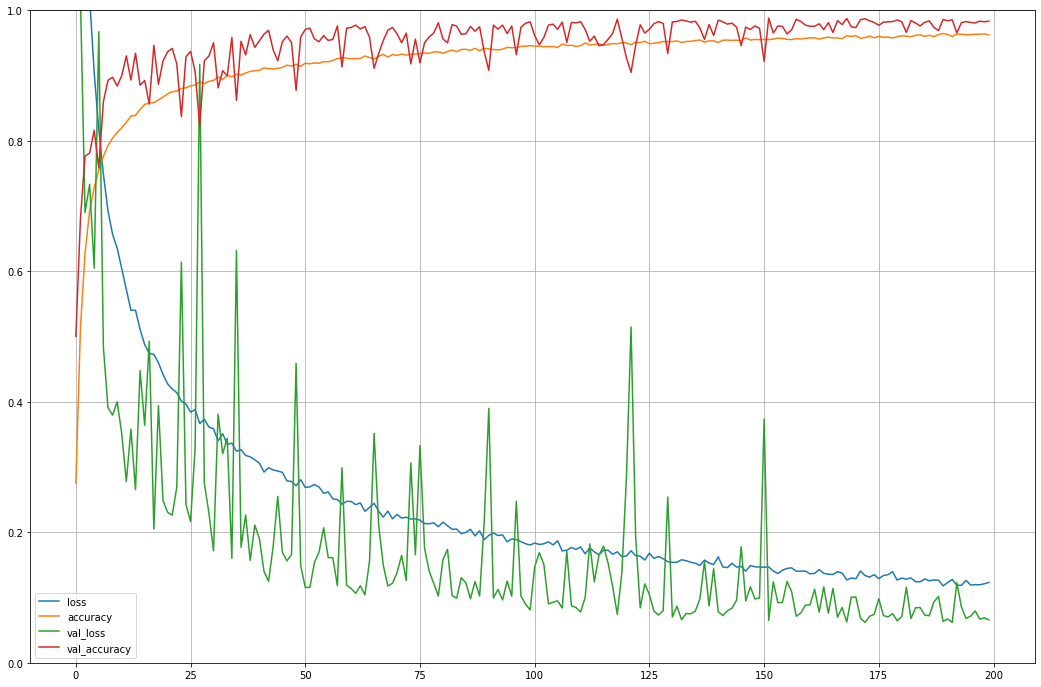

In [37]:
pd.DataFrame(history.history).plot(figsize=(18, 12))
plt.grid(True)
plt.gca().set_ylim(0, 1)

In [50]:
#y_test = np.argmax(y_test,axis=1)
y_pred = np.argmax(model.predict(x_test), axis=1)

print('- Test set accuracy: {:.2f}%\n- Training accuracy: {:.2f}%\n- Validation accuracy: {:.2f}%'.
format(accuracy_score(y_test,y_pred)*100,(history.history['accuracy'][-1])*100,(history.history['val_accuracy'][-1])*100))

- Test set accuracy: 98.29%
- Training accuracy: 96.25%
- Validation accuracy: 98.37%


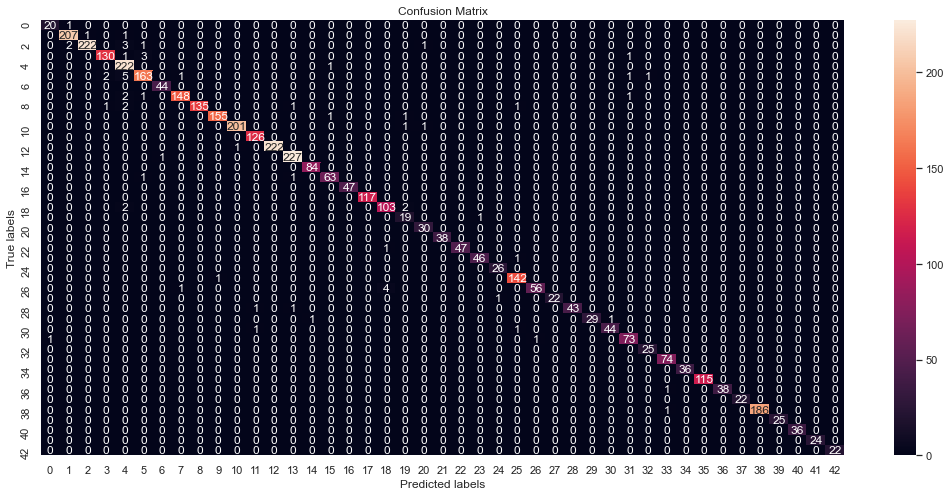

In [44]:
cm = confusion_matrix(y_test, y_pred)
sns.set(rc = {'figure.figsize':(18,8)})
ax = plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax);

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); ax.set_title('Confusion Matrix'); 